<a href="https://colab.research.google.com/github/AjayINSE6220/Ajay_INSE_6220_Project-/blob/main/Ajay_Final_inse6220.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [87]:
!pip install pycaret==3.0.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [88]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
import pandas as pd
plt.rcParams['figure.figsize'] = (7,5)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [89]:
print("Pandas version: ", pd.__version__)
print("Seaborn version: ", sns.__version__)

Pandas version:  1.5.3
Seaborn version:  0.12.2


In [90]:
df = pd.read_csv('https://raw.githubusercontent.com/AjayINSE6220/DATASET/main/dataSAIPILLOw.csv')
df.head(5)

,t,lm,bo,rem,sr,hr,sl
0,91.840,16.600,89.840,99.60,1.840,74.20,3
1,91.552,15.880,89.552,98.88,1.552,72.76,3
2,96.000,10.000,95.000,85.00,7.000,60.00,1
3,90.768,13.920,88.768,96.92,0.768,68.84,3
4,97.872,6.496,96.248,72.48,8.248,53.12,0


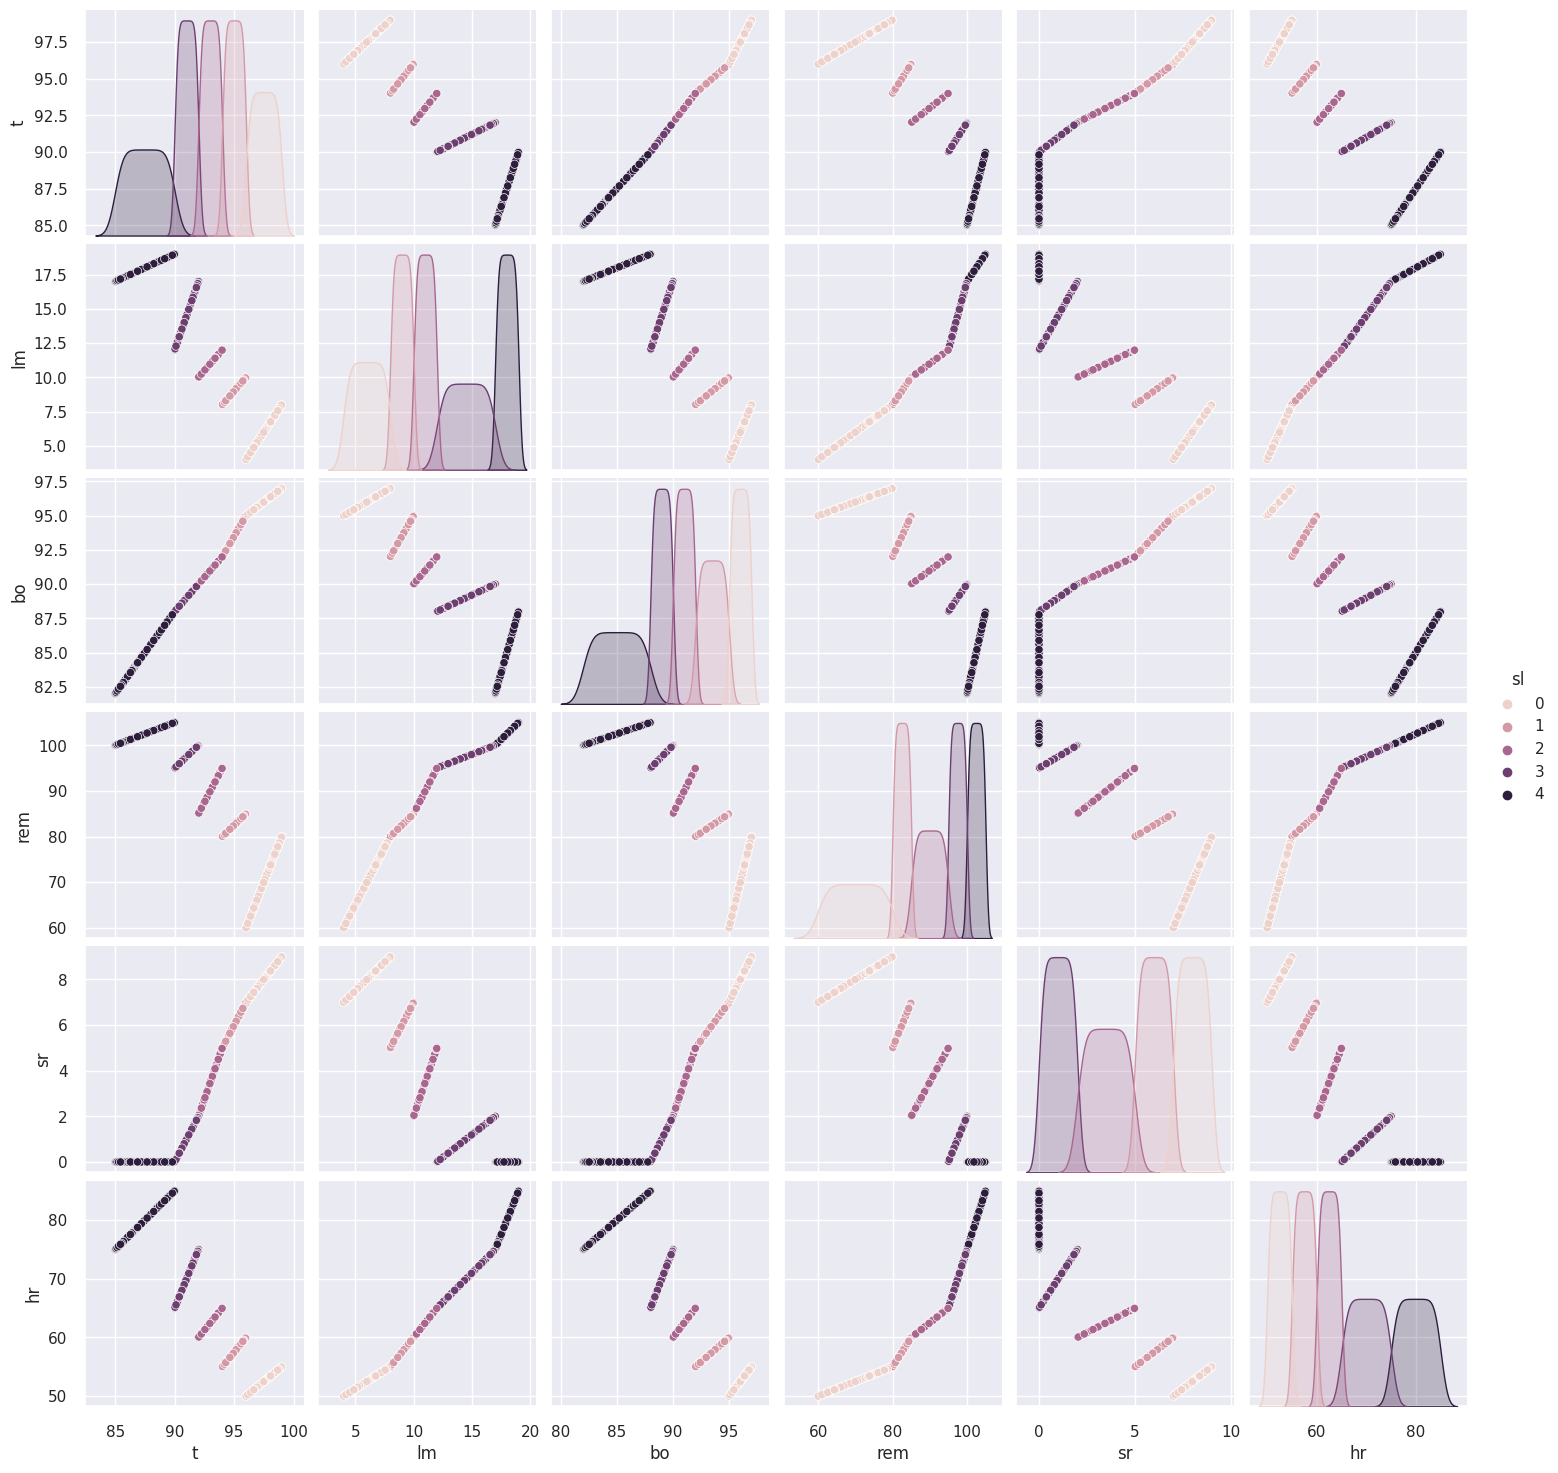

In [91]:
sns.pairplot(df, hue='sl')
plt.show()

In [92]:
X = df.drop(columns=['sl'])
X.head(10)

,t,lm,bo,rem,sr,hr
0,91.840,16.600,89.840,99.60,1.840,74.20
1,91.552,15.880,89.552,98.88,1.552,72.76
2,96.000,10.000,95.000,85.00,7.000,60.00
3,90.768,13.920,88.768,96.92,0.768,68.84
4,97.872,6.496,96.248,72.48,8.248,53.12
5,95.376,9.376,94.064,83.44,6.376,58.44
6,97.200,5.600,95.800,68.00,7.800,52.00
7,99.000,8.000,97.000,80.00,9.000,55.00
8,96.168,4.224,95.112,61.12,7.112,50.28
9,95.104,9.104,93.656,82.76,6.104,57.76


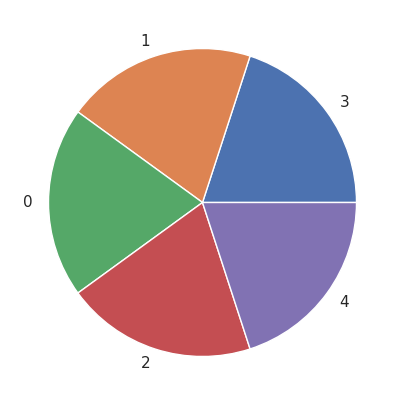

In [93]:
y =df['sl']
y.value_counts().plot(kind='pie')
plt.ylabel('')
plt.show()

In [94]:
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
t,630.0,92.8,3.529690,85.0,90.50,93.0,95.50,99.0
lm,630.0,11.7,4.299629,4.0,8.50,11.0,15.75,19.0
bo,630.0,90.9,3.902483,82.0,88.50,91.0,94.25,97.0
rem,630.0,88.5,11.893747,60.0,81.25,90.0,98.75,105.0
sr,630.0,3.7,3.054572,0.0,0.50,3.5,6.50,9.0
hr,630.0,64.5,9.915277,50.0,56.25,62.5,72.50,85.0


In [95]:
Xs = StandardScaler().fit_transform(X)
Xcols = X.columns
X = pd.DataFrame(Xs)
X.columns = Xcols
X.head(10)

,t,lm,bo,rem,sr,hr
0,-0.272195,1.140539,-0.271838,0.934005,-0.609407,0.979066
1,-0.353853,0.972949,-0.345696,0.873421,-0.703767,0.833720
2,0.907316,-0.395697,1.051448,-0.294506,1.081206,-0.454206
3,-0.576145,0.516734,-0.546753,0.708498,-0.960635,0.438056
4,1.438095,-1.211299,1.371498,-1.347997,1.490099,-1.148636
5,0.730389,-0.540941,0.811410,-0.425772,0.876760,-0.611664
6,1.247559,-1.419854,1.256609,-1.724964,1.343317,-1.261683
7,1.757924,-0.861223,1.564349,-0.715229,1.736483,-0.958879
8,0.954950,-1.740136,1.080170,-2.303879,1.117902,-1.435290
9,0.653267,-0.604253,0.706778,-0.482990,0.787642,-0.680299


In [96]:
observations = list(df.index)
variables = list(df.columns)

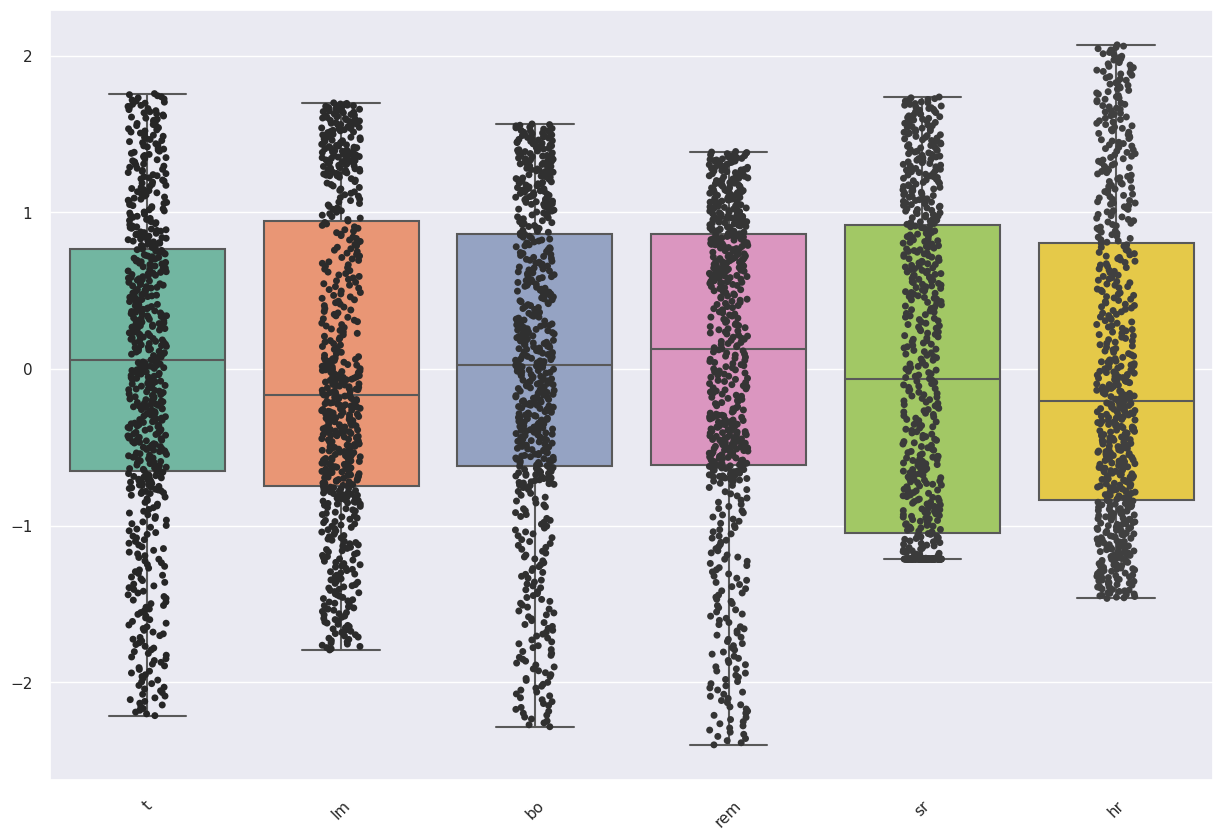

In [97]:
# Use swarmplot() or stripplot to show the datapoints on top of the boxes:
#plt. figure()

ax = plt.figure(figsize=(15,10))    
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax = sns.stripplot(data=X, color=".25") 
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);
     

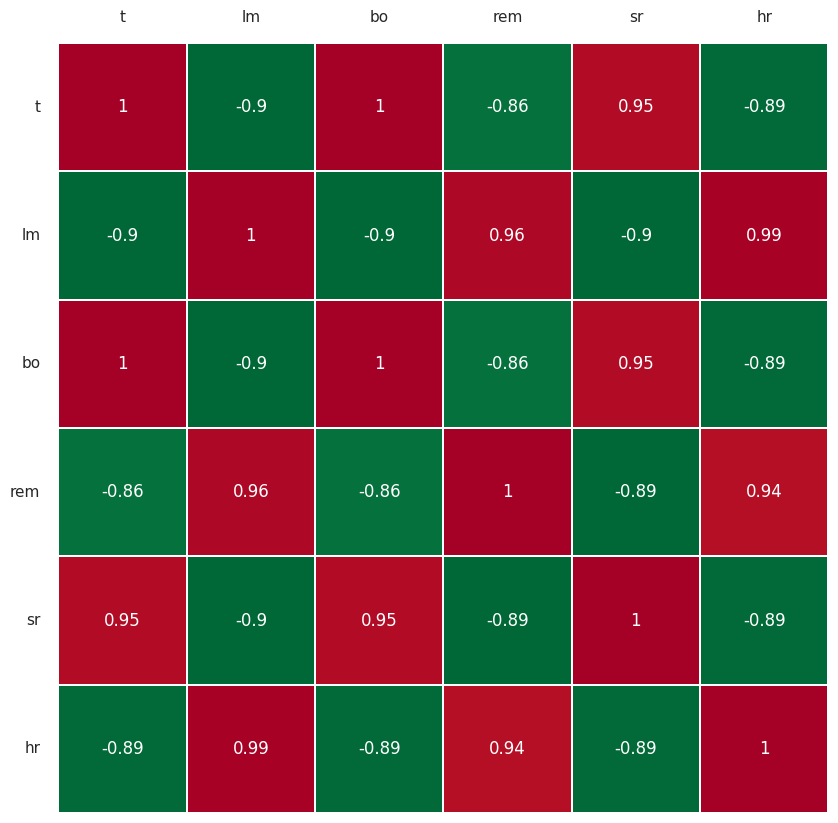

In [98]:
fig1,ax1 = plt.subplots(figsize=(15,10))
ax = sns.heatmap(X.corr(), cmap='RdYlGn_r', linewidths=0.3, annot=True, cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0);

#X.corr().style.background_gradient(cmap='coolwarm').set_precision(2)
#sns.clustermap(X.corr(), annot=True, fmt='.2f')

Text(0, 0.5, 'Z2')

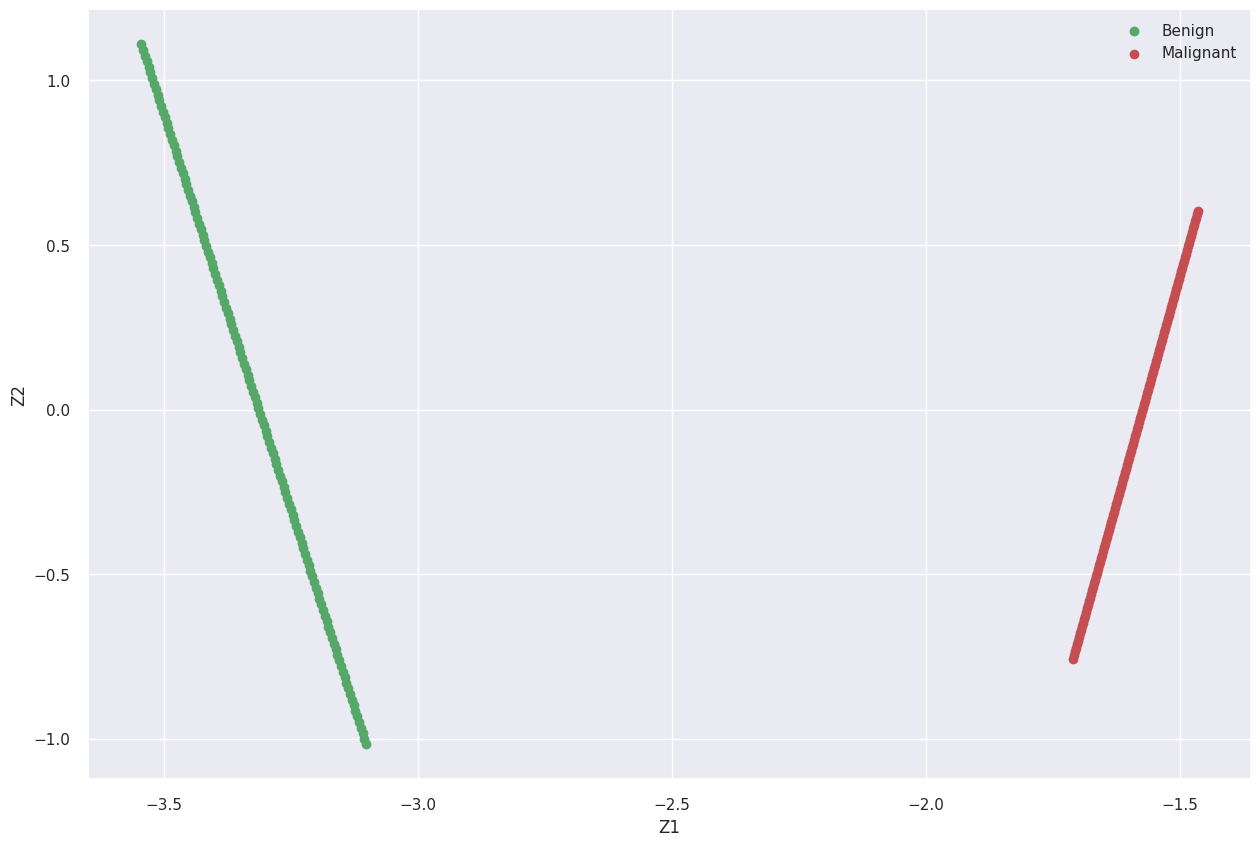

In [99]:
pca = PCA()
Z = pca.fit_transform(X)

# (Malignant)->1,  (Benign)->0

idx_Benign= np.where(y == 0)
idx_Malignant = np.where(y == 1)


plt. figure(figsize=(15,10))
plt.scatter(Z[idx_Benign,0], Z[idx_Benign,1], c='g', label='Benign')
plt.scatter(Z[idx_Malignant,0], Z[idx_Malignant,1], c='r', label='Malignant')


plt.legend()
plt.xlabel('Z1')
plt.ylabel('Z2')

array([[-0.40858389, -0.46748025,  0.19215922, -0.22295708,  0.08545614,
        -0.72151482],
       [ 0.41267769, -0.38591924, -0.23724669, -0.02127676,  0.78816644,
         0.05308899],
       [-0.40874525, -0.45165233,  0.19622929, -0.34994665, -0.00358936,
         0.68407311],
       [ 0.40246839, -0.4511472 ,  0.56898077,  0.49761018, -0.24912672,
         0.03265363],
       [-0.40825409, -0.29032644, -0.55478377,  0.65659009, -0.08164107,
         0.05897725],
       [ 0.4086948 , -0.37512064, -0.48657862, -0.38554941, -0.55022599,
        -0.06401035]])

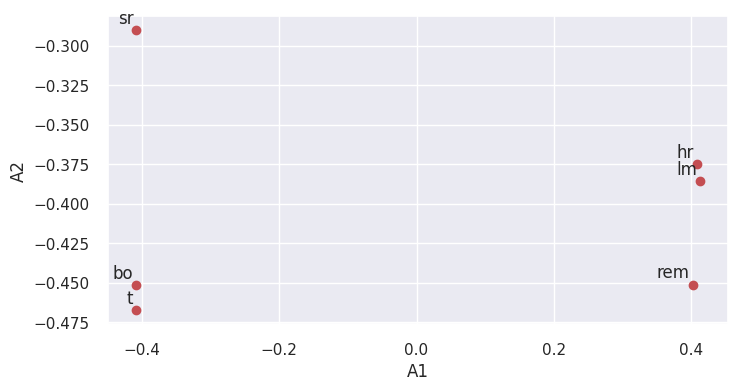

In [100]:

A = pca.components_.T 
plt. figure(figsize=(8,4))

plt.scatter(A[:,0],A[:,1],c='r')
plt.xlabel('A1')
plt.ylabel('A2')
for label, x, y in zip(variables, A[:, 0], A[:, 1]):
  plt.annotate(label, xy=(x, y), xytext=(-2, 2), textcoords='offset points', ha='right', va='bottom')
A

array([5.60082061e+00, 2.76852031e-01, 8.25852097e-02, 4.48004285e-02,
       2.97562457e-03, 1.50504631e-03])

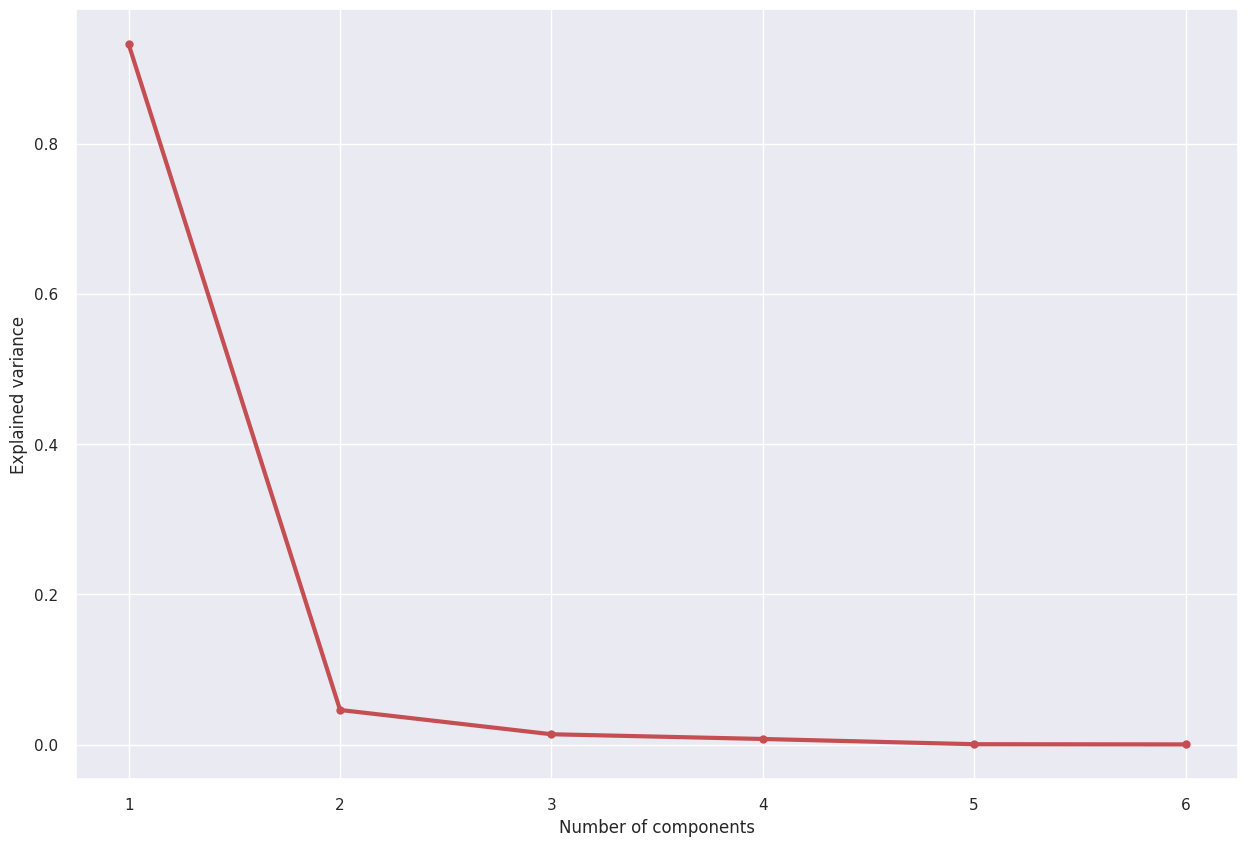

In [101]:
#Eigenvalues
Lambda = pca.explained_variance_ 

#Scree plot
x = np.arange(len(Lambda)) + 1
plt. figure(figsize=(15,10))
plt.plot(x,Lambda/sum(Lambda), 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
Lambda

Text(0, 0.5, 'Cumulative explained variance')

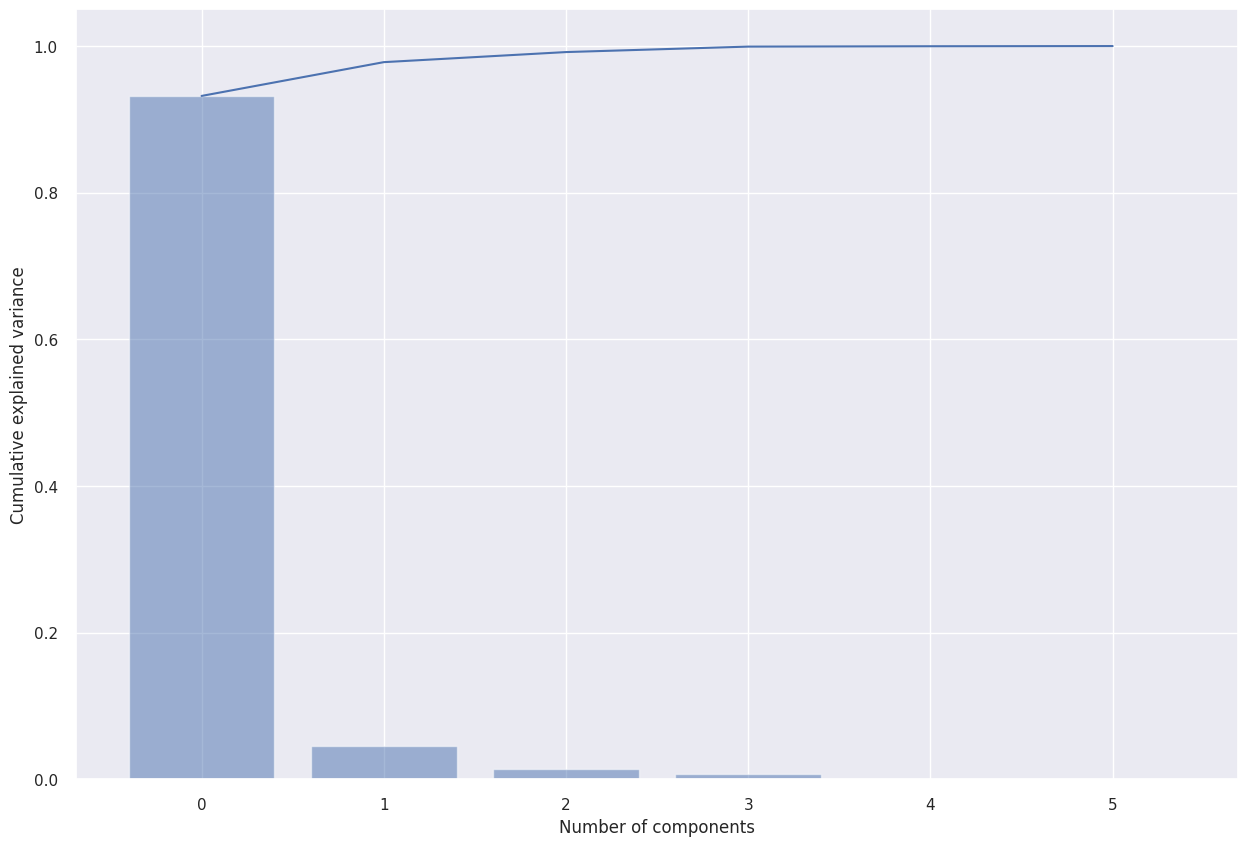

In [102]:
ell = pca.explained_variance_ratio_
ind = np.arange(len(ell))
plt. figure(figsize=(15,10))
plt.bar(ind, ell, align='center', alpha=0.5)
plt.plot(np.cumsum(ell))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

In [103]:
!pip install pca

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [104]:
from pca import pca
# Initialize and keep all PCs
model = pca()
# Fit transform
out = model.fit_transform(X)

[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [6] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [2] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [6] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[2]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


In [105]:
out['PC']

,PC1,PC2
0,1.717841,-0.801849
1,1.666972,-0.556391
2,-1.709352,-0.756989
3,1.528493,0.111799
4,-3.268358,-0.217851
...,...,...
625,-0.103732,0.093209
626,-3.240001,-0.354005
627,3.499875,0.314700
628,-1.675898,-0.571812


[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.


(<Figure size 2500x1500 with 1 Axes>,
 <Axes: title={'center': '2 Principal Components explain [99.17%] of the variance'}, xlabel='PC1 (93.1% expl.var)', ylabel='PC2 (4.60% expl.var)'>)

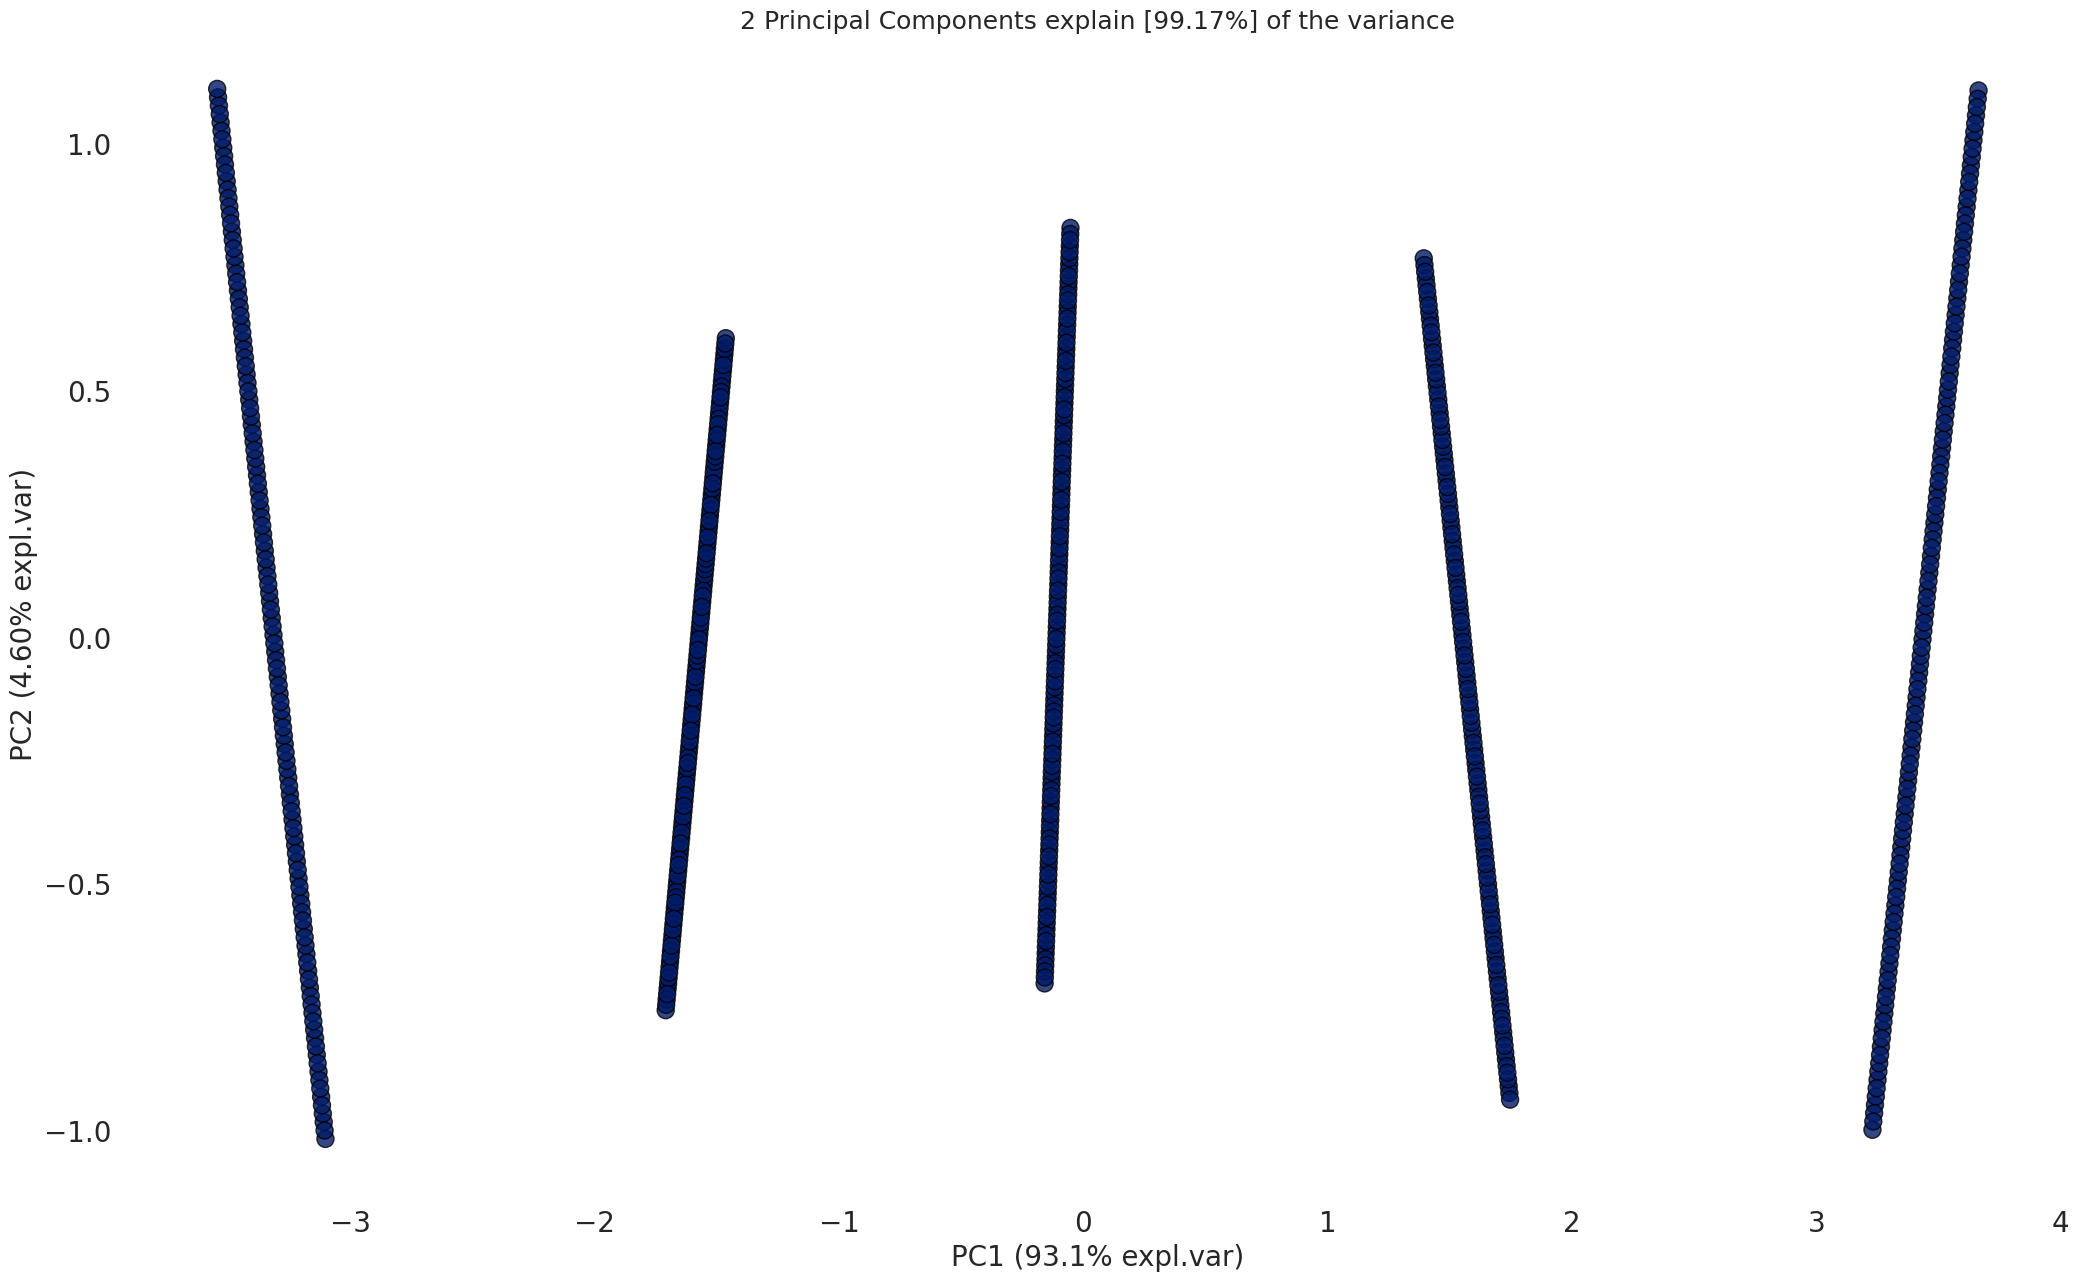

In [106]:
model.scatter(label=True, legend=False)

In [107]:
A = out['loadings'].T
A

,PC1,PC2
t,-0.408584,-0.467480
lm,0.412678,-0.385919
bo,-0.408745,-0.451652
rem,0.402468,-0.451147
sr,-0.408254,-0.290326
hr,0.408695,-0.375121


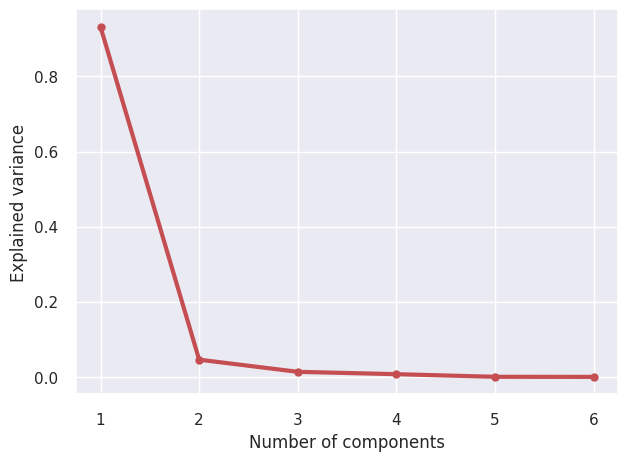

In [108]:
VR = out['variance_ratio']
x = np.arange(len(VR)) + 1
plt.plot(x, VR, 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance') 
plt.show()

In [109]:
from pycaret.utils import version
version()

'3.0.0'

In [110]:
data = df.sample(frac=0.9, random_state=786)
data_unseen = df.drop(data.index)
#dr = df.drop(columns=['id'])

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (567, 7)
Unseen Data For Predictions: (63, 7)


In [111]:
from pycaret.classification import *
clf = setup(data=data, target='sl', train_size=0.7, session_id=123)

,Description,Value
0,Session id,123
1,Target,sl
2,Target type,Multiclass
3,Original data shape,"(567, 7)"
4,Transformed data shape,"(567, 7)"
5,Transformed train set shape,"(396, 7)"
6,Transformed test set shape,"(171, 7)"
7,Numeric features,6
8,Preprocess,True
9,Imputation type,simple


In [112]:
#show the best model and their statistics
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.2450
knn,K Neighbors Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.1420
nb,Naive Bayes,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.1120
lda,Linear Discriminant Analysis,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0750
et,Extra Trees Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.6280
lightgbm,Light Gradient Boosting Machine,0.9925,0.9976,0.9925,0.9933,0.9923,0.9906,0.9909,0.3620
rf,Random Forest Classifier,0.9899,1.0000,0.9899,0.9910,0.9899,0.9874,0.9877,0.4200
xgboost,Extreme Gradient Boosting,0.9874,0.9973,0.9874,0.9887,0.9873,0.9842,0.9846,0.3690
dt,Decision Tree Classifier,0.9798,0.9872,0.9798,0.9824,0.9794,0.9747,0.9756,0.2160
gbc,Gradient Boosting Classifier,0.9773,0.9906,0.9773,0.9806,0.9771,0.9716,0.9726,1.3500


Processing:   0%|          | 0/65 [00:00<?, ?it/s]